In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import shap

In [2]:
data = pd.read_csv(r"/content/data.csv")

In [3]:
data.tail()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1
1499,34,1,2,11,5,12.910472,63,40,26,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [6]:
data.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [7]:
data.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'HiringDecision'],
      dtype='object')

In [16]:
data['HiringDecision'].value_counts(normalize=True)

,proportion
HiringDecision,
0,0.69
1,0.31


In [8]:
data['Gender'].value_counts()

,count
Gender,
0,762
1,738


In [9]:
df = data.copy()

# **Exploratory Data Analysis**

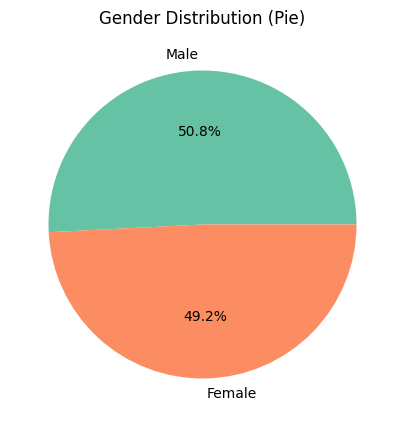

In [12]:
gender_counts = df['GenderLabel'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.title('Gender Distribution (Pie)')
plt.show()

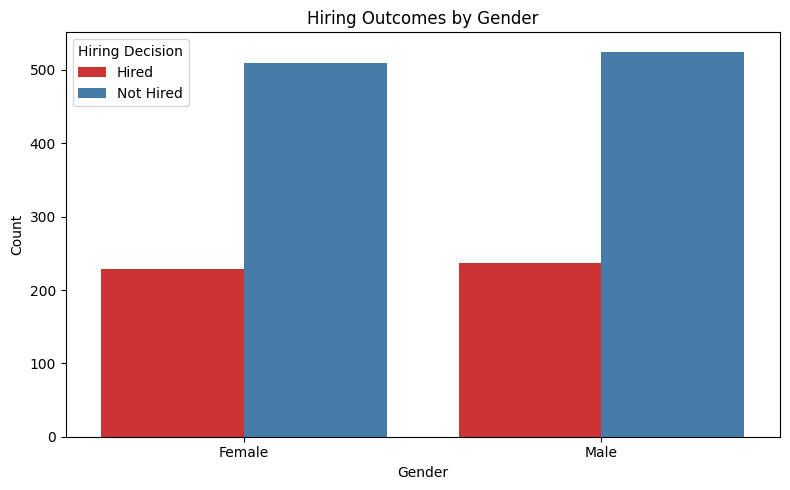

In [19]:
df['HiringLabel'] = df['HiringDecision'].map({0: 'Not Hired', 1: 'Hired'})

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='GenderLabel', hue='HiringLabel', palette='Set1')

plt.title('Hiring Outcomes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Hiring Decision')
plt.tight_layout()
plt.show()

In [20]:
fig = px.histogram(df, x='GenderLabel', color='HiringLabel',
                   barmode='group',
                   title='Hiring Outcomes by Gender',
                   color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

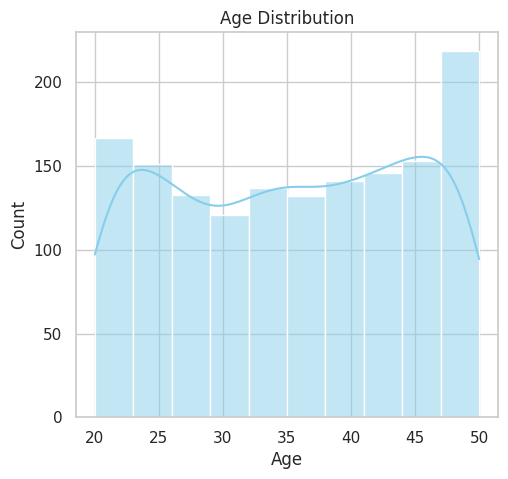

In [21]:
# Age distribution
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

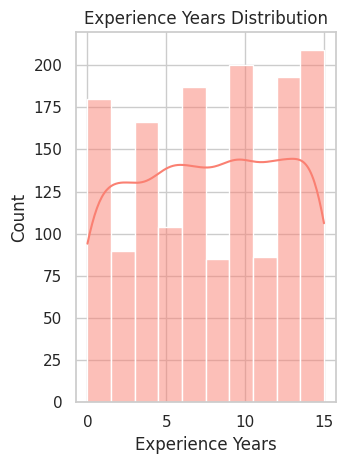

In [22]:
# Experience Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['ExperienceYears'], bins=10, kde=True, color='salmon')
plt.title('Experience Years Distribution')
plt.xlabel('Experience Years')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

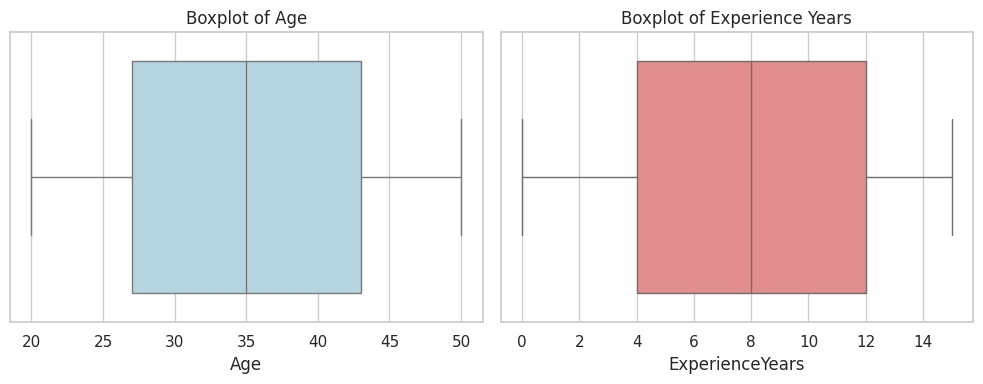

In [23]:
plt.figure(figsize=(10, 4))

# Age Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'], color='lightblue')
plt.title('Boxplot of Age')

# Experience Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['ExperienceYears'], color='lightcoral')
plt.title('Boxplot of Experience Years')

plt.tight_layout()
plt.show()

In [25]:
data.dtypes

,0
Age,int64
Gender,int64
EducationLevel,int64
ExperienceYears,int64
PreviousCompanies,int64
DistanceFromCompany,float64
InterviewScore,int64
SkillScore,int64
PersonalityScore,int64
RecruitmentStrategy,int64


In [26]:
numerical_cols = df[['Age', 'ExperienceYears',  'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']]

# Detecting outliers using IQR
outlier_summary = {}

for col in numerical_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    outlier_summary[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": outlier_count
    }

outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)

                     Lower Bound  Upper Bound  Outlier Count
Age                     3.000000    67.000000            0.0
ExperienceYears        -8.000000    24.000000            0.0
DistanceFromCompany   -24.509867    75.086714            0.0
InterviewScore        -50.000000   150.000000            0.0
SkillScore            -49.625000   151.375000            0.0
PersonalityScore      -56.500000   155.500000            0.0


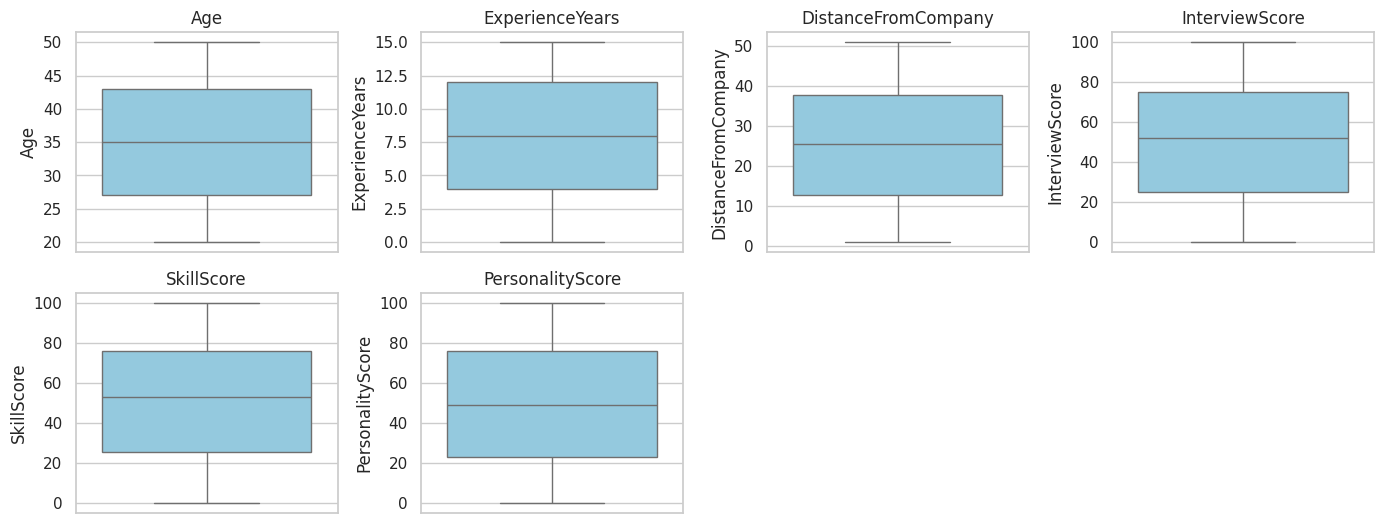

In [27]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

/tmp/ipython-input-28-2644546462.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




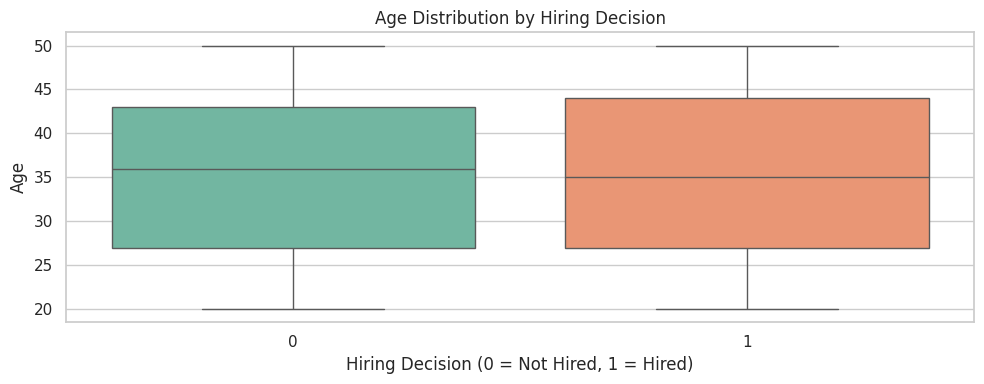

In [28]:
# Hiring Rates by ages
plt.figure(figsize=(10, 4))
sns.boxplot(x='HiringDecision', y='Age', data=df, palette='Set2')
plt.title("Age Distribution by Hiring Decision")
plt.xlabel("Hiring Decision (0 = Not Hired, 1 = Hired)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

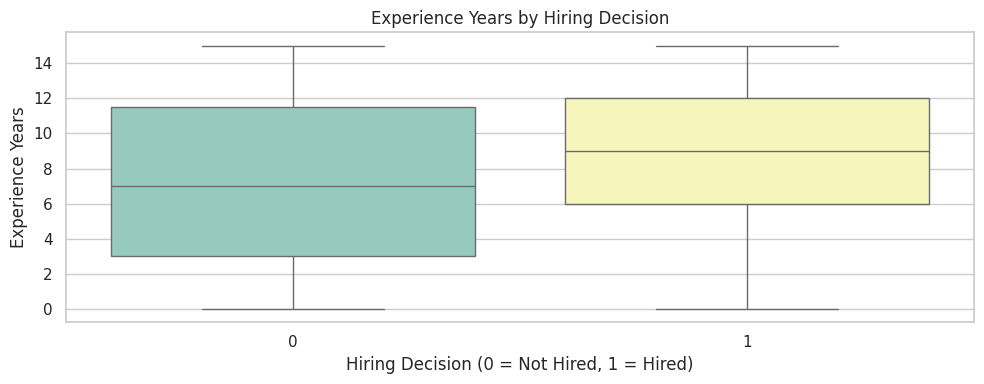

In [33]:
# Hiring Rates by Experience Years
plt.figure(figsize=(10, 4))
sns.boxplot(x='HiringDecision', y='ExperienceYears', data=df, palette='Set3')
plt.title("Experience Years by Hiring Decision")
plt.xlabel("Hiring Decision (0 = Not Hired, 1 = Hired)")
plt.ylabel("Experience Years")
plt.tight_layout()
plt.show()

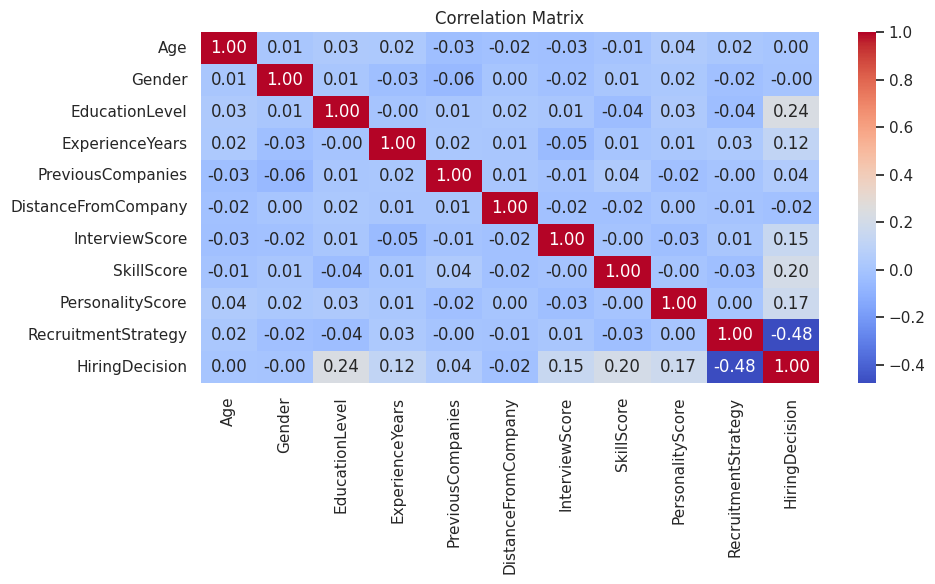

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [244]:
df.corr(numeric_only=True)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
Age,1.000000,0.011286,0.032610,0.024780,-0.032580,-0.021031,-0.025579,-0.008068,0.037727,0.018064,0.001850
Gender,0.011286,1.000000,0.009676,-0.028502,-0.061915,0.003822,-0.020887,0.012333,0.023729,-0.023753,-0.002249
EducationLevel,0.032610,0.009676,1.000000,-0.000951,0.007367,0.020600,0.012807,-0.043367,0.031115,-0.036923,0.236710
ExperienceYears,0.024780,-0.028502,-0.000951,1.000000,0.015784,0.007920,-0.051701,0.006323,0.013891,0.029603,0.122494
PreviousCompanies,-0.032580,-0.061915,0.007367,0.015784,1.000000,0.009187,-0.008387,0.040883,-0.024572,-0.000466,0.044025
DistanceFromCompany,-0.021031,0.003822,0.020600,0.007920,0.009187,1.000000,-0.019594,-0.016891,0.004627,-0.007315,-0.016791
InterviewScore,-0.025579,-0.020887,0.012807,-0.051701,-0.008387,-0.019594,1.000000,-0.004887,-0.027967,0.012004,0.146064
SkillScore,-0.008068,0.012333,-0.043367,0.006323,0.040883,-0.016891,-0.004887,1.000000,-0.004266,-0.031189,0.203668
PersonalityScore,0.037727,0.023729,0.031115,0.013891,-0.024572,0.004627,-0.027967,-0.004266,1.000000,0.004712,0.169177
RecruitmentStrategy,0.018064,-0.023753,-0.036923,0.029603,-0.000466,-0.007315,0.012004,-0.031189,0.004712,1.000000,-0.477552


In [56]:
df = data.copy()

# **Data Preprocessing**

In [57]:
from sklearn.preprocessing import MinMaxScaler

# Define the features to scale
features_to_scale = [
    'Age',
    'EducationLevel',
    'ExperienceYears',
    'PreviousCompanies',
    'DistanceFromCompany',
    'InterviewScore',
    'SkillScore',
    'PersonalityScore'
]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# (Optional) Save scaler if needed later
import joblib
joblib.dump(scaler, 'minmax_scaler.pkl')

['minmax_scaler.pkl']

In [58]:
df_scaled

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,0.200000,1,0.333333,0.000000,0.50,0.515450,0.48,0.78,0.91,1,1
1,0.633333,1,1.000000,0.800000,0.50,0.497013,0.35,0.68,0.80,2,1
2,0.933333,0,0.333333,0.200000,0.25,0.177927,0.20,0.67,0.13,2,0
3,0.466667,1,0.333333,0.333333,0.25,0.107611,0.36,0.27,0.70,3,0
4,0.333333,0,0.000000,0.400000,0.00,0.842135,0.23,0.52,0.85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,0.933333,0,0.333333,0.200000,0.75,0.163175,0.66,0.03,0.80,3,1
1496,0.233333,1,0.333333,0.666667,0.50,0.276542,0.43,0.97,0.07,2,0
1497,0.133333,1,0.000000,0.066667,0.25,0.065221,0.31,0.91,0.58,1,1
1498,0.933333,0,0.333333,0.266667,0.75,0.705907,0.09,0.37,0.44,2,1


In [59]:
# One hot Encoding
from sklearn.preprocessing import OneHotEncoder

df_encoded = pd.get_dummies(df_scaled, columns=['RecruitmentStrategy'], prefix='Strategy')

In [60]:
df_encoded

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision,Strategy_1,Strategy_2,Strategy_3
0,0.200000,1,0.333333,0.000000,0.50,0.515450,0.48,0.78,0.91,1,True,False,False
1,0.633333,1,1.000000,0.800000,0.50,0.497013,0.35,0.68,0.80,1,False,True,False
2,0.933333,0,0.333333,0.200000,0.25,0.177927,0.20,0.67,0.13,0,False,True,False
3,0.466667,1,0.333333,0.333333,0.25,0.107611,0.36,0.27,0.70,0,False,False,True
4,0.333333,0,0.000000,0.400000,0.00,0.842135,0.23,0.52,0.85,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.933333,0,0.333333,0.200000,0.75,0.163175,0.66,0.03,0.80,1,False,False,True
1496,0.233333,1,0.333333,0.666667,0.50,0.276542,0.43,0.97,0.07,0,False,True,False
1497,0.133333,1,0.000000,0.066667,0.25,0.065221,0.31,0.91,0.58,1,True,False,False
1498,0.933333,0,0.333333,0.266667,0.75,0.705907,0.09,0.37,0.44,1,False,True,False


In [61]:
df_encoded[['Strategy_1', 'Strategy_2', 'Strategy_3']] = df_encoded[['Strategy_1', 'Strategy_2', 'Strategy_3']].astype(int)

In [62]:
df_encoded

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision,Strategy_1,Strategy_2,Strategy_3
0,0.200000,1,0.333333,0.000000,0.50,0.515450,0.48,0.78,0.91,1,1,0,0
1,0.633333,1,1.000000,0.800000,0.50,0.497013,0.35,0.68,0.80,1,0,1,0
2,0.933333,0,0.333333,0.200000,0.25,0.177927,0.20,0.67,0.13,0,0,1,0
3,0.466667,1,0.333333,0.333333,0.25,0.107611,0.36,0.27,0.70,0,0,0,1
4,0.333333,0,0.000000,0.400000,0.00,0.842135,0.23,0.52,0.85,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.933333,0,0.333333,0.200000,0.75,0.163175,0.66,0.03,0.80,1,0,0,1
1496,0.233333,1,0.333333,0.666667,0.50,0.276542,0.43,0.97,0.07,0,0,1,0
1497,0.133333,1,0.000000,0.066667,0.25,0.065221,0.31,0.91,0.58,1,1,0,0
1498,0.933333,0,0.333333,0.266667,0.75,0.705907,0.09,0.37,0.44,1,0,1,0


### **Target Distribution**

In [66]:
df_encoded['HiringDecision'].value_counts(normalize=True)

,proportion
HiringDecision,
0,0.69
1,0.31


In [67]:
df_final = df_encoded.copy()

# **Data Modeling**

### Data Splitting

In [69]:
# Split into features and target
X = df_final.drop(columns=['HiringDecision'])
y = df_final['HiringDecision']

# Step 1: Stratified Split to preserve HiringDecision distribution
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Step 2: Combine X and y back temporarily to simulate gender imbalance
train_full = X_train_full.copy()
train_full['HiringDecision'] = y_train_full

# Step 3: Create gender bias in training set (e.g., 80% males, 20% females)

df_male = train_full[train_full['Gender'] == 0]
df_female = train_full[train_full['Gender'] == 1]

# Sample 80% of males, 20% of females
biased_train = pd.concat([
    df_male.sample(frac=0.8, random_state=42),
    df_female.sample(frac=0.2, random_state=42)
])

# Shuffle the biased training set
biased_train = biased_train.sample(frac=1.0, random_state=42).reset_index(drop=True)

# Final X_train and y_train
X_train = biased_train.drop(columns=['HiringDecision'])
y_train = biased_train['HiringDecision']

In [74]:
# training model
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# predictions
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       207
           1       0.80      0.71      0.75        93

    accuracy                           0.85       300
   macro avg       0.84      0.81      0.82       300
weighted avg       0.85      0.85      0.85       300

Test Accuracy: 0.8533333333333334


In [78]:
# Checking training error
y_train_pred = clf.predict(X_train)

print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred))
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       404
           1       0.86      0.74      0.80       206

    accuracy                           0.87       610
   macro avg       0.87      0.84      0.85       610
weighted avg       0.87      0.87      0.87       610

Training Accuracy: 0.8721311475409836


### **Disparities in prediction rates across gender groups**
- Shows raw counts of predictions per gender:

  - How many males were predicted as hired.
  - How many females were predicted as hired.

- This directly reflects any gender disparity in predictions.

Gender-wise prediction counts (0 = Male, 1 = Female):
y_pred    0   1
Gender         
0       108  36
1       115  41


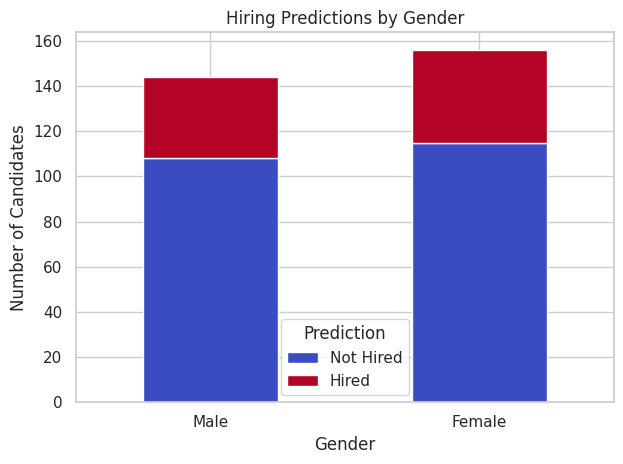

In [89]:
# Add predictions and true labels to test set
X_test_gender = X_test.copy()
X_test_gender['Gender'] = X_test['Gender']  # just to be sure
X_test_gender['y_true'] = y_test
X_test_gender['y_pred'] = y_pred

# Group by Gender and prediction
gender_pred_counts = X_test_gender.groupby(['Gender', 'y_pred']).size().unstack(fill_value=0)

print("Gender-wise prediction counts (0 = Male, 1 = Female):")
print(gender_pred_counts)

# bar plot
gender_prediction_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Hiring Predictions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=0)
plt.legend(title='Prediction')
plt.tight_layout()
plt.show()

# **Bias Detection and Measurement**
- Evaluating if the model is biased against a group.

**1. Demographic Parity (DP)**

  - **Goal:** Are people hired at the same rate across gender groups?



In [80]:
male = X_test_gender[X_test_gender['Gender'] == 0]
female = X_test_gender[X_test_gender['Gender'] == 1]

# 1. Demographic Parity
dp_male = np.mean(male['y_pred'] == 1)
dp_female = np.mean(female['y_pred'] == 1)
demographic_parity = dp_male - dp_female

print(f"Demographic Parity: {demographic_parity:.4f}")

Demographic Parity: -0.0513


### Conclusion
  - **Females were 5.13% more likely to be hired than males.**

- The model is slightly biased in favor of females.

**2. Equal Opportunity (EO)**
  - **Goal:** Among qualified candidates (true label = 1), are both genders selected at the same rate?

In [81]:
# Equal Opportunity
tpr_male = np.mean((male['y_pred'] == 1) & (male['y_true'] == 1)) / np.mean(male['y_true'] == 1)
tpr_female = np.mean((female['y_pred'] == 1) & (female['y_true'] == 1)) / np.mean(female['y_true'] == 1)
equal_opportunity = tpr_male - tpr_female

print(f"Equal Opportunity: {equal_opportunity:.4f}")

Equal Opportunity: -0.1047


### Conclusion
  - **Females have a higher recall than males.**

  - **Males are underrecognized by the model when they are actually qualified (y_true = 1).**

This means qualified males were 10.47% less likely to be hired compared to qualified females.
- So the model shows unfair treatment against males in this metric (females are favored in recall).



**3. Average Odds Difference (AOD)**
  - **Goal:** Combines both false positive rate and true positive rate differences.

In [82]:
# Average Odds Difference
fpr_male = np.mean((male['y_pred'] == 1) & (male['y_true'] == 0)) / np.mean(male['y_true'] == 0)
fpr_female = np.mean((female['y_pred'] == 1) & (female['y_true'] == 0)) / np.mean(female['y_true'] == 0)
aod = 0.5 * ((fpr_male - fpr_female) + (tpr_male - tpr_female))

print(f"Average Odds Difference: {aod:.4f}")

Average Odds Difference: -0.0383


### Conclusion
- That means:
  - **On average, males have lower TPR and lower FPR compared to females.**
- This suggests that **the model treats females slightly better compared to males.**

# **Random Forest Model (Best Model)**

In [157]:
# model training
rf_clf = RandomForestClassifier(
    n_estimators= 80,
    max_depth= 20,
    min_samples_split= 7,
    min_samples_leaf= 6,
    max_features= 'sqrt',
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Predict on test data
y_pred = rf_clf.predict(X_test)

# Predict on training data
y_train_pred = rf_clf.predict(X_train)

# Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9147540983606557
Test Accuracy: 0.8866666666666667

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       207
           1       0.86      0.75      0.80        93

    accuracy                           0.89       300
   macro avg       0.88      0.85      0.86       300
weighted avg       0.89      0.89      0.88       300



Gender-wise prediction counts (0 = Male, 1 = Female):
y_pred    0   1
Gender         
0       112  32
1       107  49


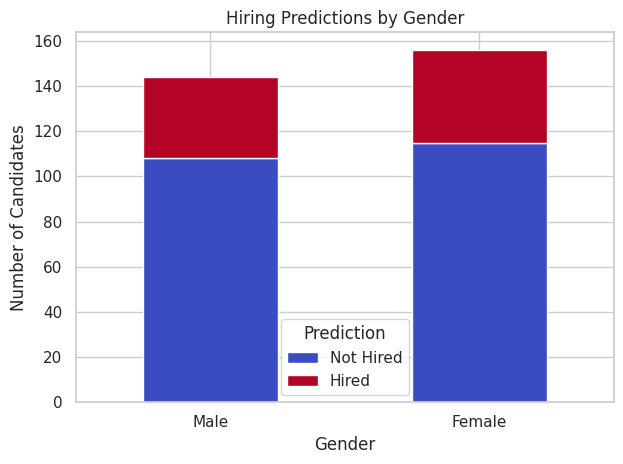

In [152]:
# Add predictions and true labels to test set
X_test_gender = X_test.copy()
X_test_gender['Gender'] = X_test['Gender']  # just to be sure
X_test_gender['y_true'] = y_test
X_test_gender['y_pred'] = y_pred

# Group by Gender and prediction
gender_pred_counts = X_test_gender.groupby(['Gender', 'y_pred']).size().unstack(fill_value=0)

print("Gender-wise prediction counts (0 = Male, 1 = Female):")
print(gender_pred_counts)

# bar plot
gender_prediction_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Hiring Predictions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=0)
plt.legend(title='Prediction')
plt.tight_layout()
plt.show()

In [153]:
male = X_test_gender[X_test_gender['Gender'] == 0]
female = X_test_gender[X_test_gender['Gender'] == 1]

# 1. Demographic Parity
dp_male = np.mean(male['y_pred'] == 1)
dp_female = np.mean(female['y_pred'] == 1)
demographic_parity = dp_male - dp_female

print(f"Demographic Parity: {demographic_parity:.4f}")

Demographic Parity: -0.0919


In [154]:
# Equal Opportunity
tpr_male = np.mean((male['y_pred'] == 1) & (male['y_true'] == 1)) / np.mean(male['y_true'] == 1)
tpr_female = np.mean((female['y_pred'] == 1) & (female['y_true'] == 1)) / np.mean(female['y_true'] == 1)
equal_opportunity = tpr_male - tpr_female

print(f"Equal Opportunity: {equal_opportunity:.4f}")

Equal Opportunity: -0.1802


In [155]:
# Average Odds Difference
fpr_male = np.mean((male['y_pred'] == 1) & (male['y_true'] == 0)) / np.mean(male['y_true'] == 0)
fpr_female = np.mean((female['y_pred'] == 1) & (female['y_true'] == 0)) / np.mean(female['y_true'] == 0)
aod = 0.5 * ((fpr_male - fpr_female) + (tpr_male - tpr_female))

print(f"Average Odds Difference: {aod:.4f}")

Average Odds Difference: -0.0855


### Conclusion
- **Females were hired 9.2% more often than males overall.**
- Qualified females (y_true=1) had **18% higher recall** than qualified males.
- On average, the **model favors females by 8.6%.**

# **Explainability & Bias Attribution**

### **SHAP Values**

In [156]:
!pip install shap

In [159]:
explainer = shap.TreeExplainer(rf_clf)

# SHAP values for test set
shap_values = explainer.shap_values(X_test)

In [163]:
# Add predictions to test set
X_test_with_pred = X_test.copy()
X_test_with_pred['y_true'] = y_test
X_test_with_pred['y_pred'] = y_pred

# selecting 5 Samples (3 Hire, 2 No-Hire)
hire_samples = X_test_with_pred[X_test_with_pred['y_pred'] == 1].sample(3, random_state=42)
nohire_samples = X_test_with_pred[X_test_with_pred['y_pred'] == 0].sample(2, random_state=42)

# Combine them
samples_to_explain = pd.concat([hire_samples, nohire_samples]).drop(columns=['y_true', 'y_pred'])
samples_to_explain

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,Strategy_1,Strategy_2,Strategy_3
1124,0.333333,1,0.333333,0.466667,1.0,0.037451,0.66,0.44,0.22,1,0,0
186,0.433333,0,0.000000,0.866667,0.0,0.634423,0.73,0.83,0.35,1,0,0
460,0.966667,1,1.000000,0.000000,0.5,0.722346,0.79,0.86,0.34,1,0,0
89,0.033333,0,0.000000,1.000000,0.5,0.845698,0.17,0.09,0.25,0,1,0
1021,0.133333,0,0.333333,0.000000,1.0,0.734971,0.62,0.03,0.58,0,1,0


In [166]:
shap_values.shape

(300, 12, 2)

In [177]:
# Select 3 'Hired' and 2 'Not Hired' samples from test predictions
hire_samples = X_test_with_pred[X_test_with_pred['y_pred'] == 1].sample(3, random_state=42)
nohire_samples = X_test_with_pred[X_test_with_pred['y_pred'] == 0].sample(2, random_state=42)

# Combine and reset index to make it 0-based
samples_to_explain = pd.concat([hire_samples, nohire_samples]).drop(columns=['y_true', 'y_pred']).reset_index(drop=True)

# Get corresponding SHAP values (for class 1)
shap_values_class1 = shap_values[1]

# Now take the first 5 rows of SHAP values
shap_samples = shap_values_class1[:5]  # since samples_to_explain is only 5 rows

In [178]:
shap_samples

array([[ 0.00856238, -0.00856238],
       [-0.00050131,  0.00050131],
       [-0.12179734,  0.12179734],
       [-0.01460014,  0.01460014],
       [ 0.00580925, -0.00580925]])

In [186]:
shap_values[1]

array([[-0.00072767,  0.00072767],
       [-0.00061433,  0.00061433],
       [ 0.04607292, -0.04607292],
       [-0.06260926,  0.06260926],
       [ 0.01480258, -0.01480258],
       [ 0.00429097, -0.00429097],
       [ 0.00546908, -0.00546908],
       [-0.08996695,  0.08996695],
       [ 0.04145662, -0.04145662],
       [-0.28343232,  0.28343232],
       [-0.1110881 ,  0.1110881 ],
       [-0.04656243,  0.04656243]])

In [187]:
# Select 3 Hired and 2 Not Hired samples from X_test and y_test
hired_indices = y_test[y_test == 1].iloc[:3].index
not_hired_indices = y_test[y_test == 0].iloc[:2].index

# Combine them
selected_indices = hired_indices.tolist() + not_hired_indices.tolist()

# Create the samples DataFrame (order matters here)
samples_to_explain = X_test.loc[selected_indices]
samples_to_explain = samples_to_explain.reset_index(drop=True)

In [188]:
shap_values = explainer.shap_values(samples_to_explain)  # Shape: (2, 5, num_features)

In [191]:
shap_values.shape

(5, 12, 2)

In [192]:
shap_values_class1 = shap_values[:, :, 1]  # shape: (5, 12)

Sample 1


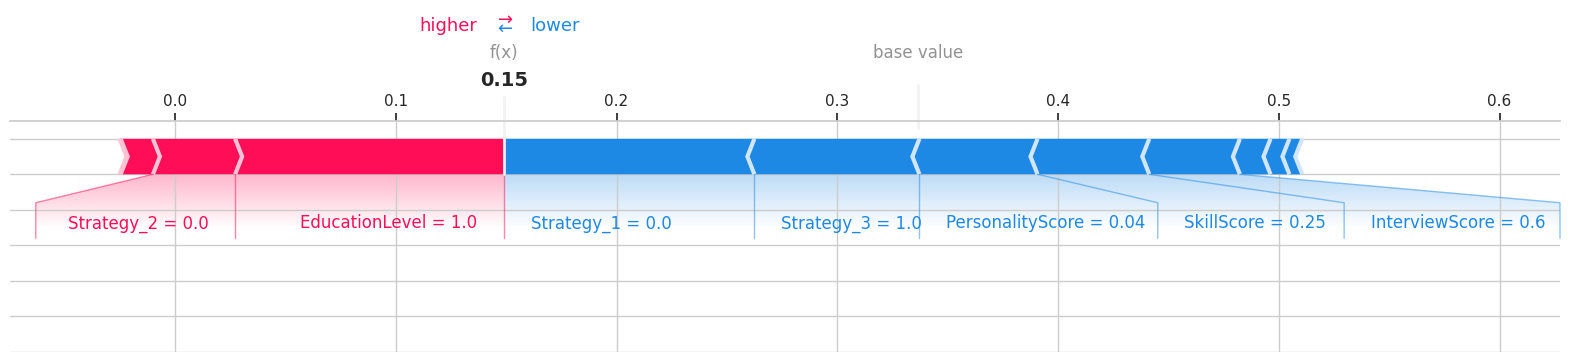

Sample 2


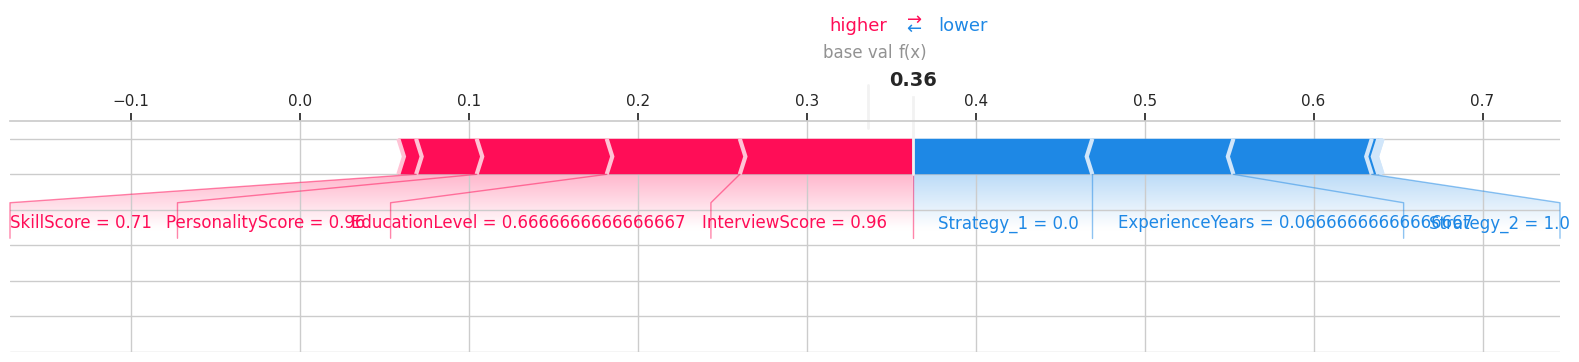

Sample 3


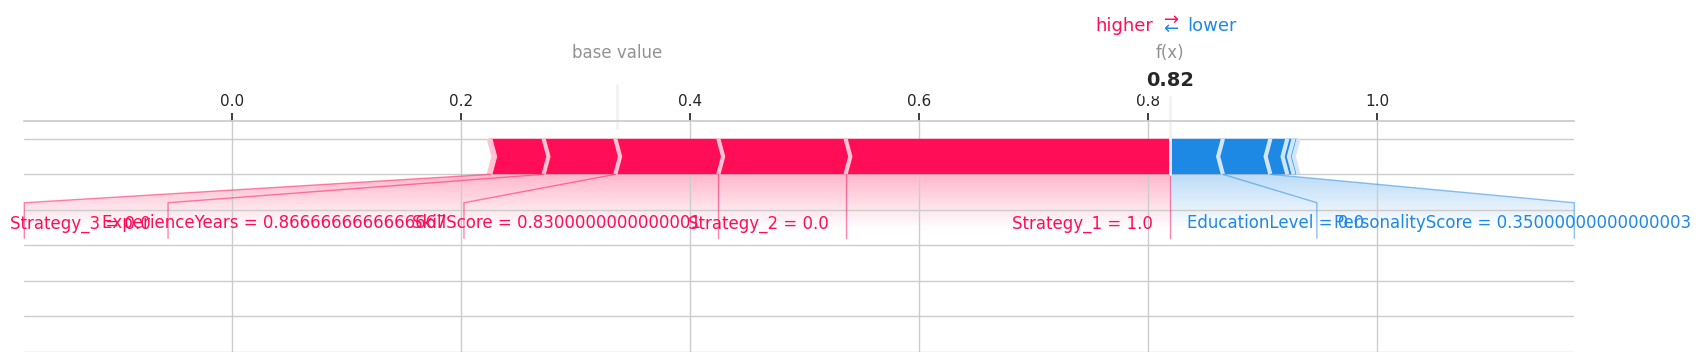

Sample 4


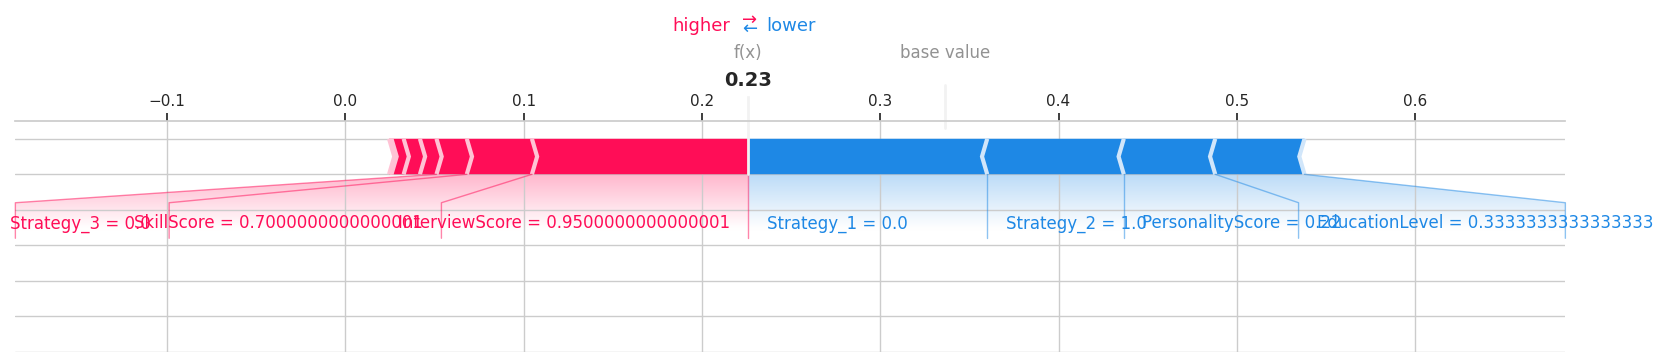

Sample 5


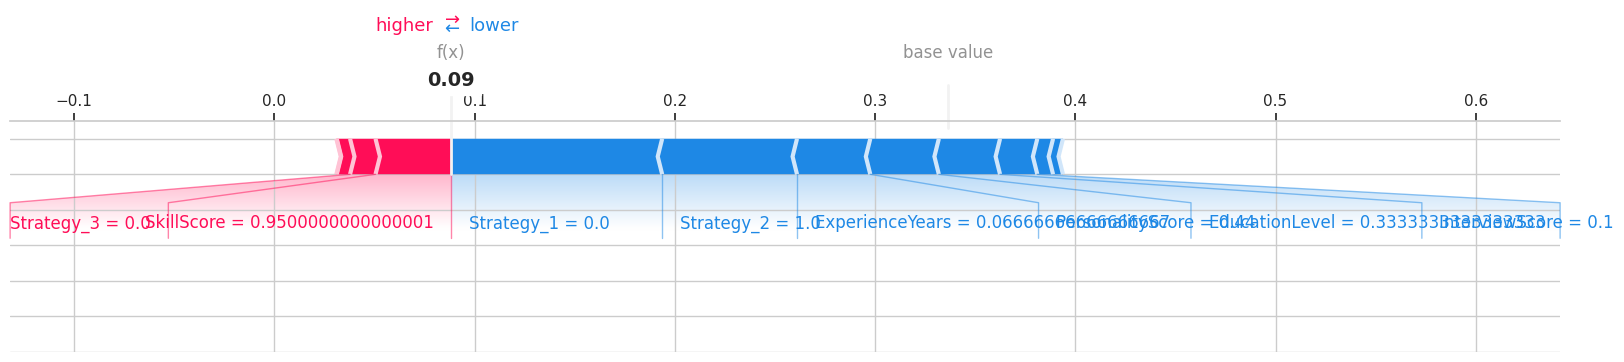

In [197]:
# Step 1: Select 3 Hire and 2 No-Hire samples
hired_indices = y_test[y_test == 1].iloc[:3].index
not_hired_indices = y_test[y_test == 0].iloc[:2].index
selected_indices = hired_indices.tolist() + not_hired_indices.tolist()

samples_to_explain = X_test.loc[selected_indices].reset_index(drop=True)

# Step 2: Compute SHAP values
shap_values = explainer.shap_values(samples_to_explain)  # shape: (5, 12, 2)
shap_values_class1 = shap_values[:, :, 1]  # For class 1 (Hire)

# Step 3: Visualize force plots
for i in range(5):
    print(f"Sample {i+1}")
    shap.initjs()
    shap.force_plot(
        explainer.expected_value[1],            # Expected value for Hire
        shap_values_class1[i],                  # SHAP values for i-th sample
        samples_to_explain.iloc[i],             # Feature values
        feature_names=samples_to_explain.columns,
        matplotlib=True
    )

# **Conclusion**
**1. Sample_1:** The applicant was **not hired (f(x) = 0.15)** as:
  - The model was already biased toward not hiring (base = 0.31).
  - The applicant’s:
    - low PersonalityScore (0.04)
    - low SkillScore (0.25)
    - Strategy_3 involvement pushed the prediction significantly lower.
- Even though EducationLevel slightly helped, it wasn't enough to overcome the negative factors.

**2. Sample_2:** The final prediction is almost equal to the base value, meaning the model is not strongly confident in either hiring or rejecting.
  - These features increased the hiring probability:
    - **SkillScore = 0.71**
      - A high skill score — very helpful.
    - **PersonalityScore = 0.96**
      - Almost perfect personality score — strongly positive.
    - **EducationLevel = 0.67 (normalized)**
      - Mid-to-high level education.
    - **InterviewScore = 0.96**
      - Extremely strong interview performance (key strength).
  - These features reduced the hiring score:
    - **Strategy_1 = 0.0**
      - Candidate did not come through Strategy 1, which might be a favorable route based on past data(small negative impact).
    - **ExperienceYears = 0.07**
      - Very low experience — major downside in this case.
    - **Strategy_2 = 1.0**
      - Candidate came through Strategy 2, which might be associated with lower success rate in training data.

**3. Sample_3:** The applicant was predicted as Hired with **82% confidence.**
  - These features increased the hiring score significantly:
    - **Strategy_3 = 0.0**
      - Not being recruited via Strategy 3 helped the candidate. (Maybe Strategy 3 is associated with weaker applicants in training.)
    - **ExperienceYears = 0.87 (normalized)**
      - This is very high experience — a strong positive factor.
    - **SkillScore = 0.83**
      - A high skill score heavily contributing to being hired.
    - **Strategy_2 = 0.0**
      - Not being recruited via Strategy 2 was a slight boost.
    - **Strategy_1 = 1.0**
      - Being recruited via Strategy 1 helped.
  - These features decreased the hiring probability, but not enough to outweigh the positives:
    - **EducationLevel = 2.0**
      - Mid-level education — perhaps candidates with higher education were generally favored in training.
    - **PersonalityScore = 0.35**
      - Below-average — had some negative influence.


###  **Features Importance**

In [233]:
# sampling a few rows from the test set
sample_X = X_test.sample(n=300, random_state=42)

# SHAP values
shap_values = explainer.shap_values(sample_X)  # This gives a list [class_0_values, class_1_values]

In [234]:
sample_X

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,Strategy_1,Strategy_2,Strategy_3
800,0.666667,1,0.666667,0.133333,1.00,0.083400,0.19,0.92,0.76,1,0,0
797,0.800000,1,0.333333,0.666667,0.25,0.413400,0.82,0.25,0.86,0,1,0
678,0.500000,0,0.000000,0.800000,0.00,0.299544,0.80,0.62,0.04,0,1,0
1144,0.066667,1,0.000000,0.800000,0.00,0.111471,0.07,0.26,0.53,0,1,0
1195,0.633333,1,0.333333,0.400000,1.00,0.256402,0.09,0.17,0.76,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
569,0.133333,0,0.666667,0.600000,0.50,0.789083,0.20,0.54,0.29,0,1,0
592,0.900000,1,0.666667,0.533333,1.00,0.858371,0.92,0.65,0.42,1,0,0
691,0.000000,1,0.333333,0.333333,0.50,0.921233,0.34,0.34,0.92,0,1,0
1421,0.800000,0,0.000000,0.600000,0.75,0.310621,0.15,0.02,0.71,0,1,0


In [235]:
print("Sample X shape:", sample_X.shape)                  # (100, features)
print("SHAP values shape:", np.array(shap_values).shape)

Sample X shape: (300, 12)
SHAP values shape: (300, 12, 2)


In [236]:
shap_values_class1 = shap_values[:, :, 1]  # shape (100,12)

In [237]:
shap_values_class0 = shap_values[:, :, 0]  # shape (100,12)

In [238]:
shap_values_class0.shape

(300, 12)

In [239]:
shap_values_class1.shape

(300, 12)

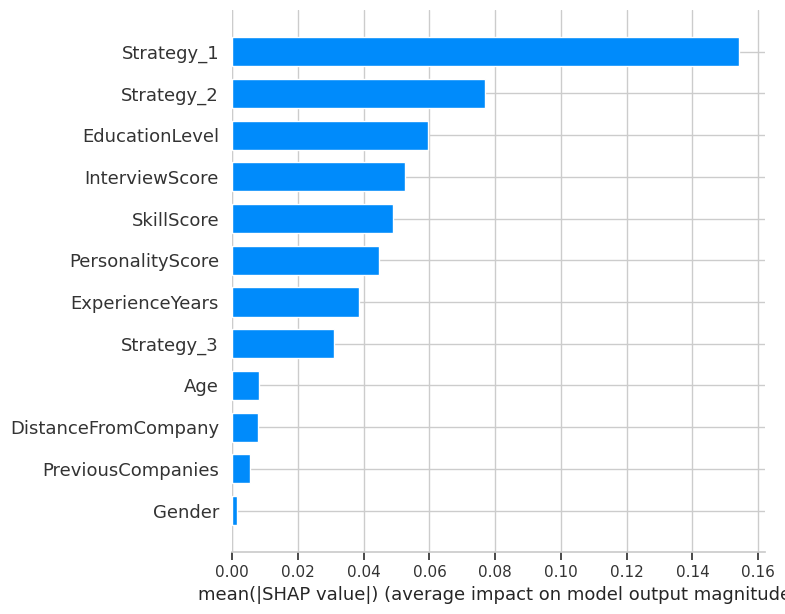

In [240]:
# global feature importance (for class 1 = Hire)
# Each bar represents the average importance of that feature (across all 100 samples).
shap.summary_plot(shap_values_class1, sample_X, plot_type="bar")

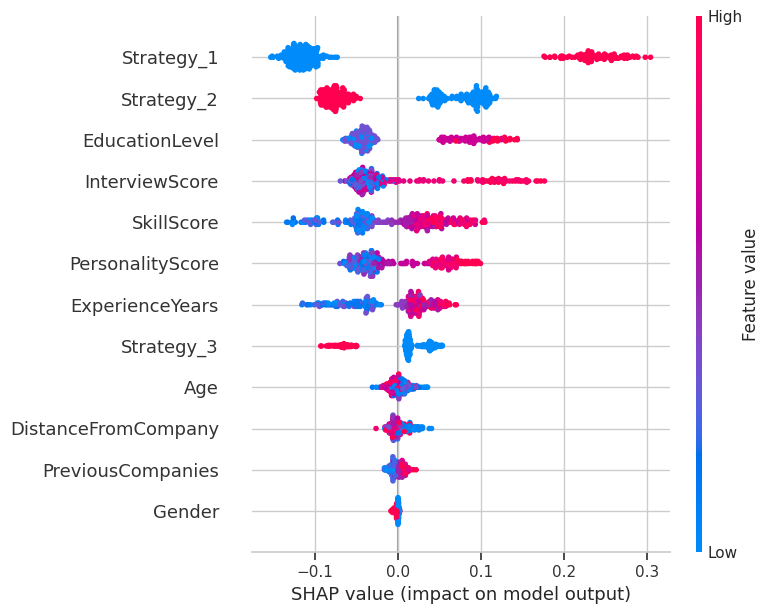

In [242]:
shap.summary_plot(shap_values_class1, sample_X, plot_type="dot")

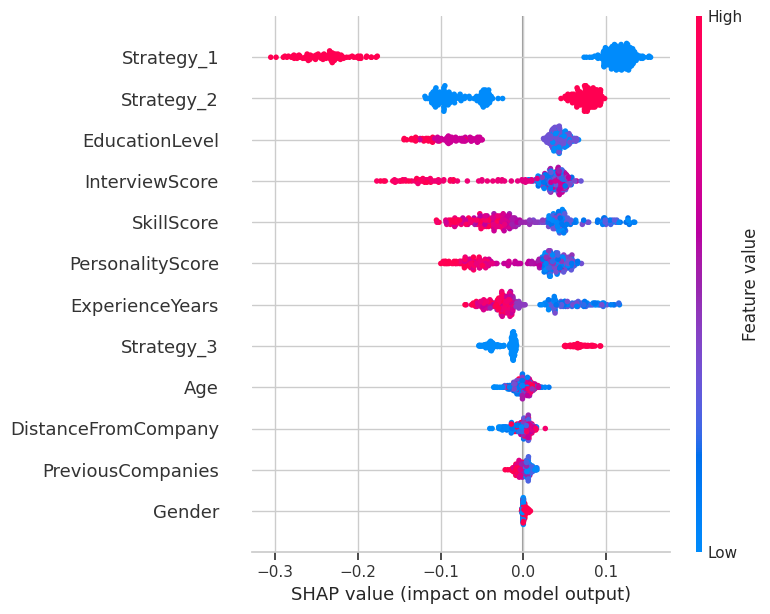

In [243]:
#global feature importance (for class 0 = Not hire)
shap.summary_plot(shap_values_class0, sample_X, plot_type="dot")

### **Conclusion**
- `Gender` has almost **zero SHAP importance** which means the model isn’t directly using the Gender feature to make hiring decisions.
- Earlier we found that:
  - **Demographic Parity:** `~9.2%` more likely to hire females.
  - **Equal Opportunity:** `~18%` more likely to correctly hire qualified females.

This suggests:
  - **Indirect bias** is present.
  - `Gender` may be correlated with other features (like lower scores or different strategy distributions).

### **Indirect Bias Flow**
`Gender` → `Strategy` → `Score Distributions` → **Prediction**.



- **SHAP results** align well with **correlation matrix**, and both validate each other.

`Gender` has a correlation of **-0.0022** with `HiringDecision`
  - This is almost **zero** (no linear influence).
    - Matching the SHAP result: **Gender has nearly 0 importance.**

- **Top Influential Features Correlation with** `HiringDecision`:
  - `RecruitmentStrategy`: **−0.477** ← Strongest (negative) correlation which matches SHAP ranking (high importance).
  - `EducationLevel`: **+0.237**
  - `SkillScore`: **+0.204**
  - `PersonalityScore`: **+0.169**
  - `InterviewScore`: **+0.146**

These all had high SHAP values(the model is heavily relying on these).
- **Low-Correlation Features:**
  - `Age`, `DistanceFromCompany`, `PreviousCompanies` all have weak correlations with the target.
These also show up as low-impact features in SHAP.

# **Bias Mitigation**

### **Re-weighing**

In [246]:
# Applying Re-weighing
!pip install -q aif360

In [250]:
from aif360.algorithms.preprocessing import Reweighing

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [247]:
df_encoded

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision,Strategy_1,Strategy_2,Strategy_3
0,0.200000,1,0.333333,0.000000,0.50,0.515450,0.48,0.78,0.91,1,1,0,0
1,0.633333,1,1.000000,0.800000,0.50,0.497013,0.35,0.68,0.80,1,0,1,0
2,0.933333,0,0.333333,0.200000,0.25,0.177927,0.20,0.67,0.13,0,0,1,0
3,0.466667,1,0.333333,0.333333,0.25,0.107611,0.36,0.27,0.70,0,0,0,1
4,0.333333,0,0.000000,0.400000,0.00,0.842135,0.23,0.52,0.85,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.933333,0,0.333333,0.200000,0.75,0.163175,0.66,0.03,0.80,1,0,0,1
1496,0.233333,1,0.333333,0.666667,0.50,0.276542,0.43,0.97,0.07,0,0,1,0
1497,0.133333,1,0.000000,0.066667,0.25,0.065221,0.31,0.91,0.58,1,1,0,0
1498,0.933333,0,0.333333,0.266667,0.75,0.705907,0.09,0.37,0.44,1,0,1,0


In [248]:
train_df = X_train.copy()
train_df['HiringDecision'] = y_train

test_df = X_test.copy()
test_df['HiringDecision'] = y_test

In [249]:
# Converting to AIF360 BinaryLabelDataset
from aif360.datasets import BinaryLabelDataset

privileged_groups = [{'Gender': 0}]
unprivileged_groups = [{'Gender': 1}]

train_bld = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_df,
    label_names=['HiringDecision'],
    protected_attribute_names=['Gender']
)

test_bld = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_df,
    label_names=['HiringDecision'],
    protected_attribute_names=['Gender']
)

In [251]:
# Re-weighing

rw = Reweighing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups
)
train_rw = rw.fit_transform(train_bld)

In [252]:
rf_rw = RandomForestClassifier(
    n_estimators=80,
    max_depth=20,
    min_samples_split=7,
    min_samples_leaf=6,
    max_features='sqrt',
    random_state=42
)

# fitting reweighed data
rf_rw.fit(train_rw.features, train_rw.labels.ravel(), sample_weight=train_rw.instance_weights)

# predictions
y_pred_rw = rf_rw.predict(X_test)

print("Test Accuracy after Reweighing:", accuracy_score(y_test, y_pred_rw))
print("\nClassification Report after Reweighing:")
print(classification_report(y_test, y_pred_rw))

Test Accuracy after Reweighing: 0.8833333333333333

Classification Report after Reweighing:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       207
           1       0.85      0.75      0.80        93

    accuracy                           0.88       300
   macro avg       0.87      0.85      0.86       300
weighted avg       0.88      0.88      0.88       300



In [253]:
# updating df with predictions
X_test_gender = X_test.copy()
X_test_gender['Gender'] = X_test['Gender']
X_test_gender['y_true'] = y_test
X_test_gender['y_pred'] = y_pred_rw

**1. Demographic Parity (DP)**

In [254]:
# splitting by `gender`
male = X_test_gender[X_test_gender['Gender'] == 0]
female = X_test_gender[X_test_gender['Gender'] == 1]

# 1. Demographic Parity
dp_male = np.mean(male['y_pred'] == 1)
dp_female = np.mean(female['y_pred'] == 1)
demographic_parity = dp_male - dp_female
print(f"Demographic Parity: {demographic_parity:.4f}")

Demographic Parity: -0.0983


**2. Equal Opportunity (EO)**

In [255]:
# (True Positive Rate Difference)
tpr_male = np.mean((male['y_pred'] == 1) & (male['y_true'] == 1)) / np.mean(male['y_true'] == 1)
tpr_female = np.mean((female['y_pred'] == 1) & (female['y_true'] == 1)) / np.mean(female['y_true'] == 1)
equal_opportunity = tpr_male - tpr_female

print(f"Equal Opportunity: {equal_opportunity:.4f}")

Equal Opportunity: -0.1802


**3. Average Odds Difference (AOD)**

In [257]:
fpr_male = np.mean((male['y_pred'] == 1) & (male['y_true'] == 0)) / np.mean(male['y_true'] == 0)
fpr_female = np.mean((female['y_pred'] == 1) & (female['y_true'] == 0)) / np.mean(female['y_true'] == 0)
aod = 0.5 * ((fpr_male - fpr_female) + (tpr_male - tpr_female))
print(f"Average Odds Difference: {aod:.4f}")

Average Odds Difference: -0.0904


### **Feature Debiasing**

In [267]:
# removing 'Gender' from train and test sets
X_train_fd = X_train.drop(columns=['Gender'])
X_test_fd = X_test.drop(columns=['Gender'])

In [268]:
rf_fd = RandomForestClassifier(
    n_estimators=80,
    max_depth=20,
    min_samples_split=7,
    min_samples_leaf=6,
    max_features='sqrt',
    random_state=42
)

rf_fd.fit(X_train_fd, y_train)

y_pred_fd = rf_fd.predict(X_test_fd)
y_train_pred_fd = rf_fd.predict(X_train_fd)

In [269]:
print("Training Accuracy (Feature Debiasing):", accuracy_score(y_train, y_train_pred_fd))
print("Test Accuracy (Feature Debiasing):", accuracy_score(y_test, y_pred_fd))

print("\nClassification Report (Feature Debiasing - Test):")
print(classification_report(y_test, y_pred_fd))

Training Accuracy (Feature Debiasing): 0.9245901639344263
Test Accuracy (Feature Debiasing): 0.8766666666666667

Classification Report (Feature Debiasing - Test):
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       207
           1       0.84      0.74      0.79        93

    accuracy                           0.88       300
   macro avg       0.87      0.84      0.85       300
weighted avg       0.87      0.88      0.87       300



In [270]:
X_test_gender_fd = X_test_fd.copy()
X_test_gender_fd['Gender'] = X_test['Gender']
X_test_gender_fd['y_true'] = y_test
X_test_gender_fd['y_pred'] = y_pred_fd

male = X_test_gender_fd[X_test_gender_fd['Gender'] == 0]
female = X_test_gender_fd[X_test_gender_fd['Gender'] == 1]

In [271]:
# Fairness metrics
dp_male = np.mean(male['y_pred'] == 1)
dp_female = np.mean(female['y_pred'] == 1)
demographic_parity_fd = dp_male - dp_female

tpr_male = np.mean((male['y_pred'] == 1) & (male['y_true'] == 1)) / np.mean(male['y_true'] == 1)
tpr_female = np.mean((female['y_pred'] == 1) & (female['y_true'] == 1)) / np.mean(female['y_true'] == 1)
equal_opportunity_fd = tpr_male - tpr_female

fpr_male = np.mean((male['y_pred'] == 1) & (male['y_true'] == 0)) / np.mean(male['y_true'] == 0)
fpr_female = np.mean((female['y_pred'] == 1) & (female['y_true'] == 0)) / np.mean(female['y_true'] == 0)
aod_fd = 0.5 * ((fpr_male - fpr_female) + (tpr_male - tpr_female))

print(f"Demographic Parity (FD): {demographic_parity_fd:.4f}")
print(f"Equal Opportunity (FD): {equal_opportunity_fd:.4f}")
print(f"Average Odds Difference (FD): {aod_fd:.4f}")

Demographic Parity (FD): -0.0849
Equal Opportunity (FD): -0.2052
Average Odds Difference (FD): -0.0884


### **Final Conclusion**
- Equal Opportunity worsened after feature debiasing.
- Despite removing `Gender`, the model still exhibits **indirect bias** (possibly due to proxy variables that correlate with gender (strategy, personality_score, interview_score)).

